In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
df = pd.read_csv('uber.csv')

In [115]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [116]:
#Preprocessing

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [118]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         200000 non-null  int64              
 1   key                200000 non-null  object             
 2   fare_amount        200000 non-null  float64            
 3   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 4   pickup_longitude   200000 non-null  float64            
 5   pickup_latitude    200000 non-null  float64            
 6   dropoff_longitude  199999 non-null  float64            
 7   dropoff_latitude   199999 non-null  float64            
 8   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 13.7+ MB


In [120]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [121]:
df.shape

(200000, 9)

In [122]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [123]:
df.dropna(inplace = True)

In [124]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [125]:
#identify outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba554f9350>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba49608290>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba53453910>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba2b9d8610>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba2b9ef4d0>],
 'means': []}

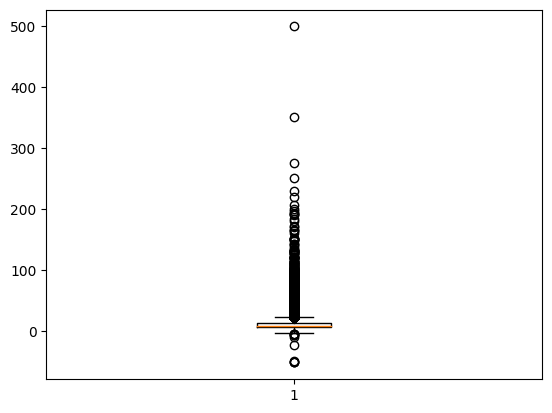

In [126]:
plt.boxplot(df['fare_amount'])

In [127]:
q1 = df['fare_amount'].quantile(0.01)
q3 = df['fare_amount'].quantile(0.99)
df = df[(df['fare_amount']>q1) & (df['fare_amount']<q3)]   #remember this

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba2b9d4510>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba4961be90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba53566990>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba49619b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba4961bad0>],
 'means': []}

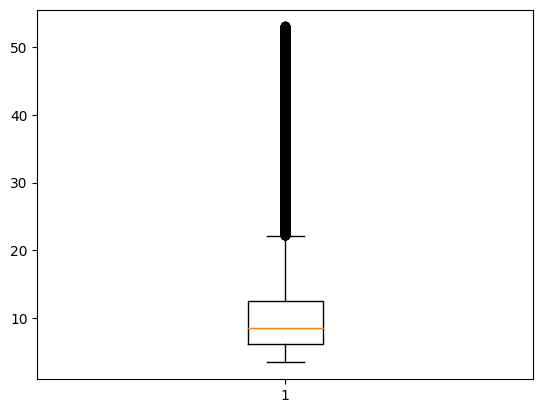

In [128]:
plt.boxplot(df['fare_amount'])

In [129]:
#correlation

In [130]:
df.drop('key' , axis = 1, inplace = True)
df.corr()

,Unnamed: 0,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
Unnamed: 0,1.000000,-0.000339,-0.001864,-0.000209,-0.000028,-0.000107,0.000647,0.002241
fare_amount,-0.000339,1.000000,0.098207,0.006534,-0.004843,0.006012,-0.007651,0.012145
pickup_datetime,-0.001864,0.098207,1.000000,0.008037,-0.008536,0.005789,-0.008432,0.005714
pickup_longitude,-0.000209,0.006534,0.008037,1.000000,-0.810943,0.832846,-0.846712,-0.000737
pickup_latitude,-0.000028,-0.004843,-0.008536,-0.810943,1.000000,-0.773097,0.697275,-0.001288
dropoff_longitude,-0.000107,0.006012,0.005789,0.832846,-0.773097,1.000000,-0.914509,-0.000020
dropoff_latitude,0.000647,-0.007651,-0.008432,-0.846712,0.697275,-0.914509,1.000000,-0.000537
passenger_count,0.002241,0.012145,0.005714,-0.000737,-0.001288,-0.000020,-0.000537,1.000000


In [131]:
#train_test_split
from sklearn.model_selection import train_test_split

In [132]:
df['pickup_datetime'] = pd.to_numeric(pd.to_datetime(df['pickup_datetime']))
x = df.drop('fare_amount' , axis = 1)  
y = df['fare_amount'] #target variable

In [133]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.20 , random_state = 1)

In [134]:
#linear regression

In [135]:
from sklearn.linear_model import LinearRegression
lrmodel = LinearRegression()

In [136]:
lrmodel.fit(x_train , y_train)
prediction = lrmodel.predict(x_test)

In [137]:
from sklearn.metrics import mean_squared_error , r2_score
lrRMSE = np.sqrt(mean_squared_error( y_test , prediction ))
lrRMSE

8.026914370354785

In [138]:
r2 = r2_score( y_test ,prediction ) #remember order
r2

0.00911686477457152

In [145]:
#random forest 

In [152]:
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(n_estimators = 100, random_state = 101)
#Fit the Forest
rfrmodel.fit(x_train, y_train)
prediction1 = rfrmodel.predict(x_test)

In [153]:
rfRMSE = np.sqrt(mean_squared_error( y_test , prediction1 ))
rfRMSE

3.4625396272103592

In [154]:
r2 = r2_score(y_test , prediction1)

In [155]:
r2

0.815619630248641